## 1. Import Libraries

In [81]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt


## 2. Read the Training Data

In [82]:
file_path = "/home/shubham/Desktop/datascience/sagemaker-flight-prices-prediction/train.csv"
flights = pd.read_csv(file_path)

flights

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info,7670


### 2.1 Fixing Data Types

In [83]:
flights.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [84]:
flights = flights.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
duration_mins        int64
dtype: object

In [85]:
flights

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,2024-10-18 10:20:00,2024-10-18 11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,2024-10-18 09:00:00,2024-10-18 07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,2024-10-18 09:10:00,2024-10-18 11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,2024-10-18 20:20:00,2024-10-18 22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,2024-10-18 17:00:00,2024-10-18 10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,2024-10-18 04:55:00,2024-10-18 07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,2024-10-18 09:35:00,2024-10-18 21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,2024-10-18 06:05:00,2024-10-18 08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,2024-10-18 08:45:00,2024-10-18 21:00:00,735,1.0,No Info,7670


In [42]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    object        
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
 10  duration_mins    640 non-null    int64         
dtypes: datetime64[ns](3), int64(3), object(5)
memory usage: 55.1+ KB


In [86]:
flights['total_stops'] = flights['total_stops'].astype(str)

In [87]:
flights.describe(include="number")

,duration,price
count,640.000000,640.000000
mean,639.773438,9075.418750
std,502.047906,4328.022872
min,75.000000,1965.000000
25%,175.000000,5636.250000
50%,505.000000,8372.000000
75%,956.250000,12386.750000
max,2565.000000,34273.000000


# Univariate analysis

#### Q1 Distribution of Price

Text(0.5, 0, 'Price (INR)')

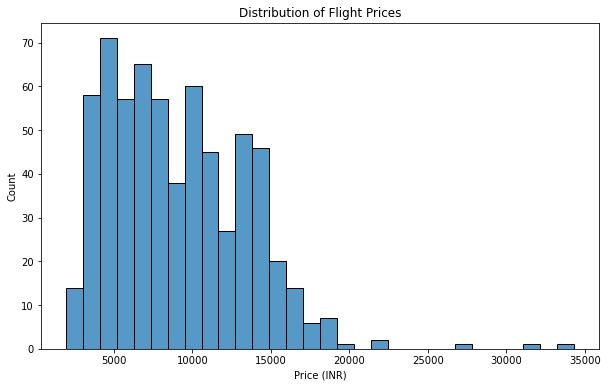

In [152]:
# Basic statistics
flights.price.describe()

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(flights.price, bins=30)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price (INR)')

#### Q2 Which airlines operate the most flights ?

Prices of Airplane is Right skewed 

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Jet Airways'),
  Text(1, 0, 'Indigo'),
  Text(2, 0, 'Air India'),
  Text(3, 0, 'Multiple Carriers'),
  Text(4, 0, 'Spicejet'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'Air Asia'),
  Text(7, 0, 'Goair')])

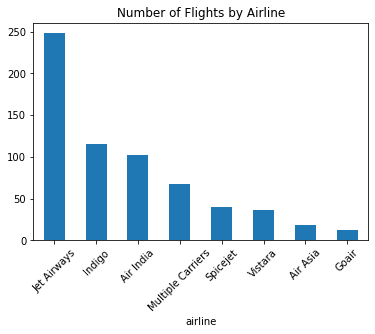

In [89]:
flights.airline.value_counts().plot(kind='bar')
plt.title('Number of Flights by Airline')
plt.xticks(rotation=45)

#### Q3 Additinal info analysis


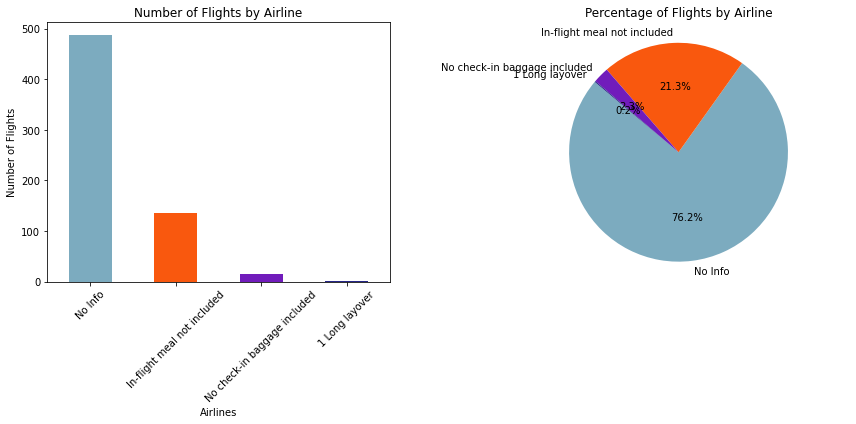

In [161]:

flight_counts = flights.additional_info.value_counts()


num_classes = len(flight_counts)
colors = np.random.rand(num_classes, 3)  # Generate random RGB colors

# Step 3: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar Chart
flight_counts.plot(kind='bar', color=colors, ax=axes[0])
axes[0].set_title('Number of Flights by Airline')
axes[0].set_xlabel('Airlines')
axes[0].set_ylabel('Number of Flights')
axes[0].tick_params(axis='x', rotation=45)

# Pie Chart
axes[1].pie(flight_counts, labels=flight_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Percentage of Flights by Airline')
axes[1].axis('equal')

# Show the plots
plt.tight_layout()
plt.show()

## Bivariate analysis

#### Q1 How do prices vary across different airlines and is there any significance difference between them

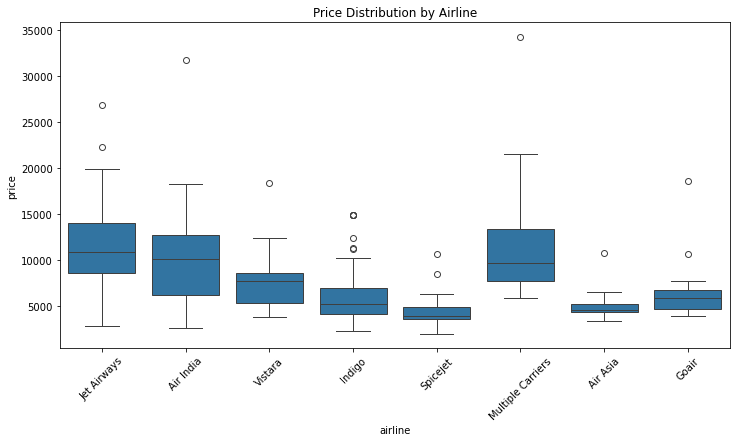

ANOVA results: F-statistic = 42.46553777098078 , p-value = 3.970400260466922e-49
Reject the null hypothesis. There is a significant difference in average prices across airlines.


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=flights)
plt.xticks(rotation=45)
plt.title('Price Distribution by Airline')
plt.show()

# Null Hypothesis (H0): The average prices of flights from all airlines are equal.
# Alternative Hypothesis (H1): At least one airline has a different average price.

anova_results = stats.f_oneway(*[group['price'].values for name, group in flights.groupby('airline')])


print('ANOVA results: F-statistic =', anova_results.statistic, ', p-value =', anova_results.pvalue)

alpha = 0.05  # Significance level

if anova_results.pvalue < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in average prices across airlines."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in average prices across airlines."

print(conclusion)


#### Q2 Is there any correlation between Price and Duration 

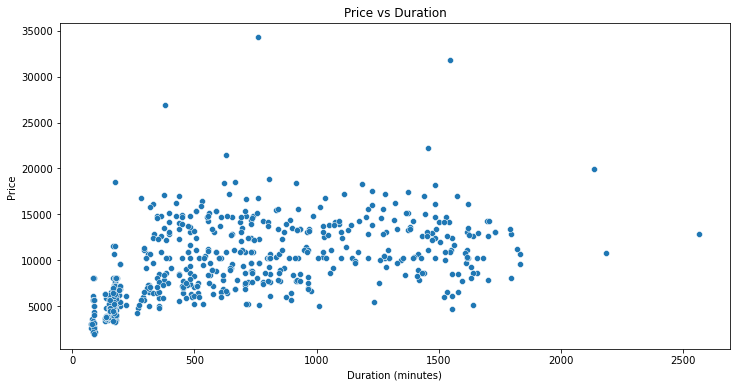

Correlation coefficient between duration and price: 0.5542220697543229
There is a positive correlation: as duration increases, price tends to increase.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert duration to minutes if needed
# Assuming 'duration' is in the format "HH:MM"
flights['duration_mins'] = flights.duration.astype(int)

# Step 2: Visualize the relationship between price and duration using a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=flights, x='duration_mins', y='price')
plt.title('Price vs Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.show()

# Step 3: Calculate the correlation coefficient
correlation_coefficient = flights['duration_mins'].corr(flights['price'])

# Step 4: Print the correlation coefficient
print('Correlation coefficient between duration and price:', correlation_coefficient)

# Step 5: Interpret the correlation coefficient
if correlation_coefficient > 0:
    interpretation = "There is a positive correlation: as duration increases, price tends to increase."
elif correlation_coefficient < 0:
    interpretation = "There is a negative correlation: as duration increases, price tends to decrease."
else:
    interpretation = "There is no correlation between duration and price."

print(interpretation)


#### Q4 Is there any significance relation between Time of day and Price of flight price

In [94]:
flights['dep_time'] = pd.to_datetime(flights['dep_time'])

def categorize_time_of_day(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

flights['time_of_day'] = flights['dep_time'].apply(categorize_time_of_day)


In [107]:
import pandas as pd
from scipy import stats

morning_prices = flights[flights['time_of_day'] == 'Morning']['price']
evening_prices = flights[flights['time_of_day'] == 'Night']['price']


t_statistic, p_value = stats.ttest_ind(morning_prices, evening_prices)

print('T-statistic:', t_statistic)
print('P-value:', p_value)

alpha = 0.05  

if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in prices between Morning and Evening flights."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in prices between Morning and Evening flights."

print(conclusion)


T-statistic: 1.920843020797941
P-value: 0.055485913512376576
Fail to reject the null hypothesis: There is no significant difference in prices between Morning and Evening flights.


#### Q3 Is there any relation between price and total stops 

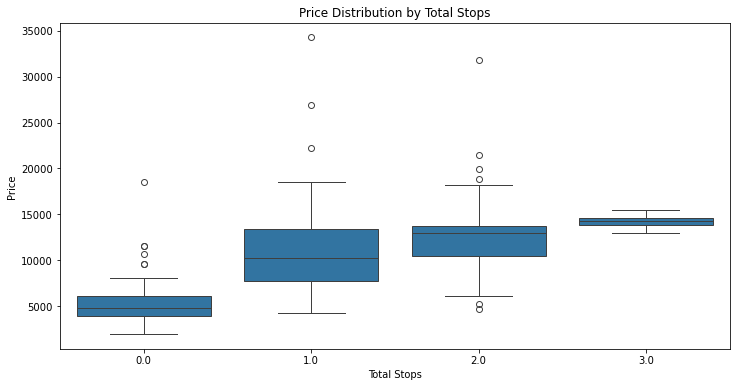

F-statistic: 169.41299311401582
P-value: 1.0467553676819972e-80
Reject the null hypothesis: There is a significant difference in prices between different numbers of stops.


In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Sample DataFrame structure (you can replace this with your actual DataFrame)
# flights = pd.DataFrame({
#     'price': [100, 150, 200, 250, 300, ...],  # Prices of the flights
#     'total_stops': [0, 1, 2, 0, 1, ...]       # Total number of stops (0, 1, 2, etc.)
# })

# Step 1: Create a box plot to visualize price distribution by total stops
plt.figure(figsize=(12, 6))
sns.boxplot(x='total_stops', y='price', data=flights)
plt.title('Price Distribution by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

# Step 2: Prepare data for ANOVA
# Group the prices by total stops
groups = [group['price'].values for name, group in flights.groupby('total_stops')]

# Step 3: Conduct ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Step 4: Print the ANOVA results
print('F-statistic:', f_statistic)
print('P-value:', p_value)

# Step 5: Interpretation of the ANOVA results
alpha = 0.05  # Common significance level

if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in prices between different numbers of stops."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in prices between different numbers of stops."

print(conclusion)


#### Q4 Analysis of Price with Total_stops and Distance

In [109]:
# Convert total_stops to numeric if it's not already
flights['total_stops'] = pd.to_numeric(flights['total_stops'], errors='coerce')

# Calculate correlation
correlation = flights['total_stops'].corr(flights['price'])
print('Correlation coefficient:', correlation)


Correlation coefficient: 0.6328030534509105


In [116]:
flights['source'].unique()
flights['destination'].unique()

array(['Hyderabad', 'Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Kolkata'],
      dtype=object)

In [139]:
import pandas as pd
from geopy.distance import great_circle

coordinates = {
    'Hyderabad': (17.385044, 78.486671),
    'Cochin': (9.931233, 76.267303),
    'Banglore': (12.971599, 77.594566),
    'Delhi': (28.613939, 77.209021),
    'New Delhi': (28.613939, 77.209021),
    'Kolkata': (22.572646, 88.363895),
    'Mumbai' : (19.0760, 72.877),
    'Chennai' : (13.0843, 80.2705)
}

def calculate_distance(row):
    source_coords = coordinates[row['source']]
    destination_coords = coordinates[row['destination']]
    return great_circle(source_coords, destination_coords).kilometers

# Step 3: Apply the function to calculate distances
flights['total_distance'] = flights.apply(calculate_distance, axis=1)


In [165]:
# One way anova for Total stops and Price
flights['total_stops'] = flights['total_stops'].astype('object')


groups = [group['price'].values for name, group in flights.groupby('total_stops')]


anova_result = stats.f_oneway(*groups)


print('ANOVA Results:')
print('F-statistic:', anova_result.statistic)
print('p-value:', anova_result.pvalue)


alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in price based on total stops.")
else:
    print("Fail to reject the null hypothesis: No significant difference in price based on total stops.")


ANOVA Results:
F-statistic: 169.41299311401582
p-value: 1.0467553676819972e-80
Reject the null hypothesis: There is a significant difference in price based on total stops.


In [166]:
flights['total_distance'].unique()

[621.529712, 2079.746773, 1560.704520, 1739.808876, 1358.239134]
Categories (5, float64): [621.529712, 1358.239134, 1560.704520, 1739.808876, 2079.746773]

In [150]:
# Two way anova for totalstops and Distance with Price

import statsmodels.api as sm
from statsmodels.formula.api import ols
# Convert total_stops and total_distance to categorical
flights['total_stops'] = flights['total_stops'].astype('category')
flights['total_distance'] = flights['total_distance'].astype('category')

# Step 2: Perform two-way ANOVA
model = ols('price ~ C(total_stops) + C(total_distance) + C(total_stops):C(total_distance)', data=flights).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Step 3: Display ANOVA results
print(anova_table)

                                        sum_sq     df          F        PR(>F)
C(total_stops)                    5.099274e+08    3.0  16.962517  1.333613e-10
C(total_distance)                 4.125450e+07    4.0   1.029235  3.107323e-01
C(total_stops):C(total_distance)  2.348681e+08   12.0   1.953196  4.236049e-02
Residual                          6.242878e+09  623.0        NaN           NaN


/home/shubham/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 9
  warnings.warn('covariance of constraints does not have full '


The two-way ANOVA results indicate that the number of total stops has a significant impact on flight prices, with a p-value of 
0.000000013 suggesting that variations in the number of stops are associated with differences in price. In contrast, total distance does not significantly influence prices, as indicated by a p-value of 
0.3107. However, there is a significant interaction between total stops and total distance (p-value 0.0424), meaning the effect of the number of stops on price varies depending on the distance. This analysis suggests that while the number of stops is a crucial factor in determining flight prices, the relationship is further influenced by the distance of the flights.

In [163]:
# post-hoc analysis with tukey's HSD to test which specific gropups of total_stops differ significantyly in their means

from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
model = ols('price ~ C(total_stops)', data=flights).fit()

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=flights['price'], groups=flights['total_stops'], alpha=0.05)

# Print the results
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper    reject
-----------------------------------------------------------
   0.0    1.0 5604.8366    0.0  4881.2408  6328.4323   True
   0.0    2.0 7536.3138    0.0  6400.6071  8672.0205   True
   0.0    3.0 9110.2582    0.0  4905.8015 13314.7149   True
   1.0    2.0 1931.4772    0.0   853.6474   3009.307   True
   1.0    3.0 3505.4217  0.137   -683.772  7694.6153  False
   2.0    3.0 1573.9444 0.7793 -2705.7264  5853.6153  False
-----------------------------------------------------------


the results indicate that having fewer stops (0 vs. 1 or 2) is associated with significantly higher prices. However, the differences between 1 and 3 stops, as well as between 2 and 3 stops, are not statistically significant. This suggests that while fewer stops tend to lead to higher prices, the effect diminishes as the number of stops increases beyond one.

#### Q5  Is there a significant association between the airline and the number of total stops? Analysis: This test will help determine if certain airlines tend to have more flights with specific numbers of stops, indicating a potential preference or operational strategy.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Sample data preparation (replace this with your actual DataFrame)
# Assuming 'flights' is your DataFrame

# Step 1: Create a contingency table
contingency_table = pd.crosstab(flights['airline'], flights['total_stops'])

# Step 2: Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Step 4: Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between airline and total stops.")
else:
    print("Fail to reject the null hypothesis: No significant association between airline and total stops.")

# Step 5: Visualization
plt.figure(figsize=(12, 6))

# Stacked Bar Chart
contingency_table.plot(kind='bar', colormap='tab10', ax=plt.gca())
plt.title('Number of Flights by Airline and Total Stops')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Total Stops')
plt.tight_layout()
plt.show()


#### Relationship Between Source and Destination
Question: Is there a significant association between the source and the destination of flights?

Variables:
Categorical: source (departure locations) and destination (arrival locations)
Analysis: This test will show if certain sources are more commonly associated with specific destinations, which can be useful for route planning and marketing strategies.

Chi-Square Statistic: 2560.0
P-value: 0.0
Reject the null hypothesis: There is a significant association between source and destination.


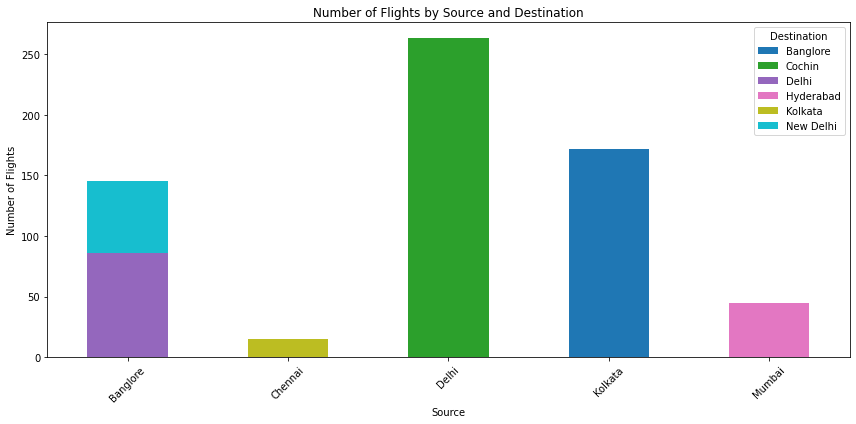

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Sample data preparation (replace this with your actual DataFrame)
# Assuming 'flights' is your DataFrame

# Step 1: Create a contingency table
contingency_table_source_destination = pd.crosstab(flights['source'], flights['destination'])

# Step 2: Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table_source_destination)

# Step 3: Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


# Step 4: Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between source and destination.")
else:
    print("Fail to reject the null hypothesis: No significant association between source and destination.")

# Step 5: Visualization
plt.figure(figsize=(12, 6))

# Stacked Bar Chart
contingency_table_source_destination.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())
plt.title('Number of Flights by Source and Destination')
plt.xlabel('Source')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.tight_layout()
plt.show()

# There a lot of flight from delhi to Cochin

#### Relationship Between Time of Day and Total StopsQuestion: Is there a significant association between the time of day and the number of total stops? Variables: Categorical: time_of_day (Morning, Afternoon, Evening, Night) and total_stops (0, 1, 2, etc.) Analysis: This will help you understand if flight schedules with more stops are concentrated in particular times of day, which could affect operational efficiency.

Chi-Square Statistic: 16.693051933847624
P-value: 0.05374541861265045
Fail to reject the null hypothesis: No significant association between time of day and total stops.


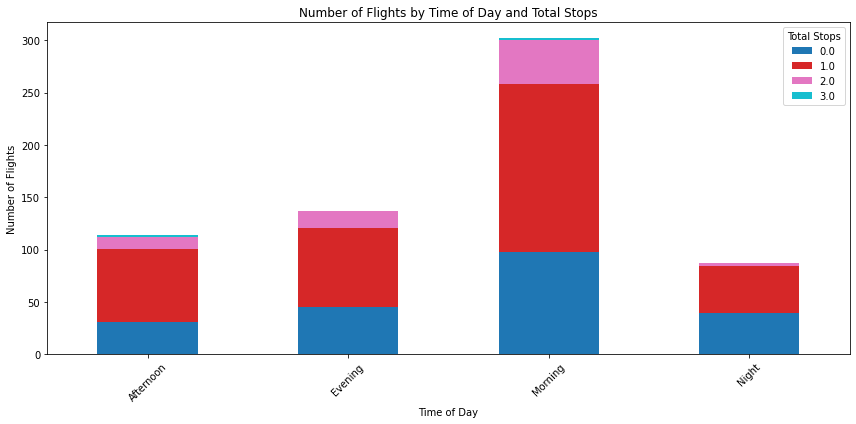

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Sample data preparation (replace this with your actual DataFrame)
# Assuming 'flights' is your DataFrame

# Step 1: Create a contingency table
contingency_table_time_stops = pd.crosstab(flights['time_of_day'], flights['total_stops'])

# Step 2: Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table_time_stops)

# Step 3: Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


# Step 4: Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between time of day and total stops.")
else:
    print("Fail to reject the null hypothesis: No significant association between time of day and total stops.")

# Step 5: Visualization
plt.figure(figsize=(12, 6))

# Stacked Bar Chart
contingency_table_time_stops.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())
plt.title('Number of Flights by Time of Day and Total Stops')
plt.xlabel('Time of Day')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Total Stops')
plt.tight_layout()
plt.show()

# There a lot of Stops in Morning fligts

#### Relationship Between Price and Total Stops (Categorical Binning) If you categorize prices into bins (e.g., Low, Medium, High), you could analyze: Question: Is there a significant association between categorized price and total stops? Variables: Categorical: Price bins (created from the price variable) and total_stops Analysis: This will provide insights into how pricing strategies might differ based on the number of stops, helping in revenue management.

Chi-Square Statistic: 134.22317272308356
P-value: 4.864400974427427e-28
Reject the null hypothesis: There is a significant association between categorized price and total stops.


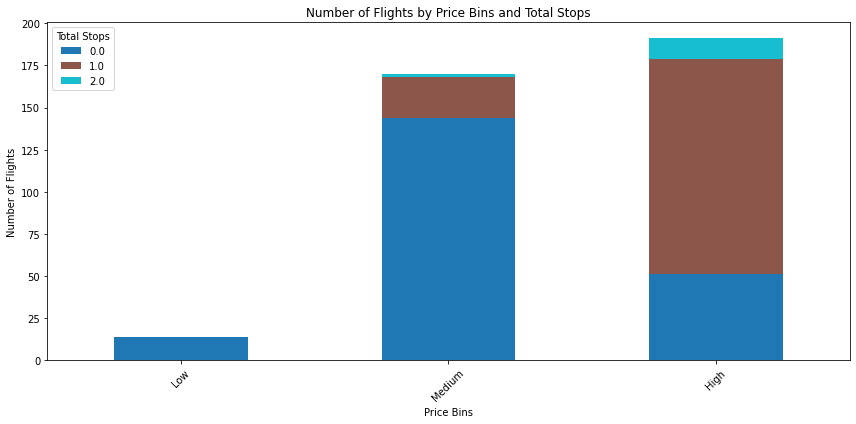

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Sample data preparation (replace this with your actual DataFrame)
# Assuming 'flights' is your DataFrame



# Step 2: Create a contingency table
contingency_table_price_stops = pd.crosstab(flights['price_bins'], flights['total_stops'])

# Step 3: Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table_price_stops)

# Step 4: Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Step 5: Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between categorized price and total stops.")
else:
    print("Fail to reject the null hypothesis: No significant association between categorized price and total stops.")

# Step 6: Visualization
plt.figure(figsize=(12, 6))

# Stacked Bar Chart
contingency_table_price_stops.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())
plt.title('Number of Flights by Price Bins and Total Stops')
plt.xlabel('Price Bins')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Total Stops')
plt.tight_layout()
plt.show()


In [186]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    object        
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
 10  time_of_day      640 non-null    object        
 11  total_distance   640 non-null    category      
 12  price_bins       375 non-null    category      
 13  price_category   640 non-null    object        
 14  price_color      640 non-null    object   

In [196]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Sample data preparation (replace this with your actual DataFrame)
# Assuming 'flights' is your DataFrame

# Step 1: Data Preparation
# Convert categorical variables to numerical using one-hot encoding
flights_encoded = pd.get_dummies(flights, columns=['airline', 'source', 'destination', 'total_stops', 'time_of_day', 'additional_info'], drop_first=True)

# Define features (X) and target variable (y)
X = flights_encoded.drop(columns=['price', 'date_of_journey', 'dep_time', 'arrival_time', 'price_bins' , 'price_category' , 'price_color'])  # Exclude non-predictive columns
y = flights_encoded['price']

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Step 3: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = model.predict(X_test)

# Step 5: Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Optional: Display model coefficients for interpretation
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Absolute Error: 1679.3919164221206
R-squared: 0.6837321763226948
                                              Coefficient
duration                                         0.691652
total_distance                                   2.110170
airline_Air India                             2002.699631
airline_Goair                                 1313.714056
airline_Indigo                                 728.753780
airline_Jet Airways                           6107.268138
airline_Multiple Carriers                     3834.468986
airline_Spicejet                               176.359297
airline_Vistara                               2055.157941
source_Chennai                                -157.154695
source_Delhi                                  -429.177478
source_Kolkata                                  12.561297
source_Mumbai                                  -78.853393
destination_Cochin                            -429.177478
destination_Delhi                            -1292.546356
de

The linear regression model for predicting flight prices has an R-squared value of approximately 0.68, indicating that about 68% of the variance in flight prices can be explained by the model. The Mean Absolute Error (MAE) is around 1,679, suggesting that, on average, the model's price predictions deviate from actual prices by this amount. Notable coefficients include the airline "Jet Airways," which has a substantial positive influence on price, adding approximately 6,107 to the base price, while "Air India" and "Multiple Carriers" also contribute significantly. The variable for total stops shows a positive relationship, with each additional stop increasing the price by about 2,900 to 6,145, depending on the number of stops. The model also indicates that flight sources and destinations can significantly affect prices, with some sources like "Delhi" and "Chennai" resulting in lower predicted prices. Lastly, additional information, such as the presence of in-flight meals, tends to decrease prices, emphasizing the importance of service features in pricing strategies.